In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
a=pd.read_csv("Breast_cancer_data.csv")

In [3]:
a.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
print(a.shape)

(569, 6)


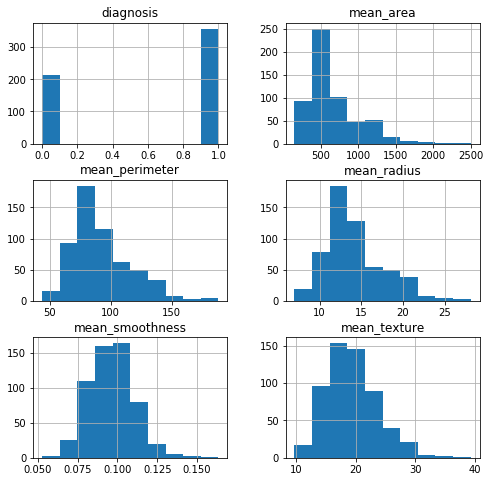

In [5]:
a.hist(figsize = (8,8))
plt.show()

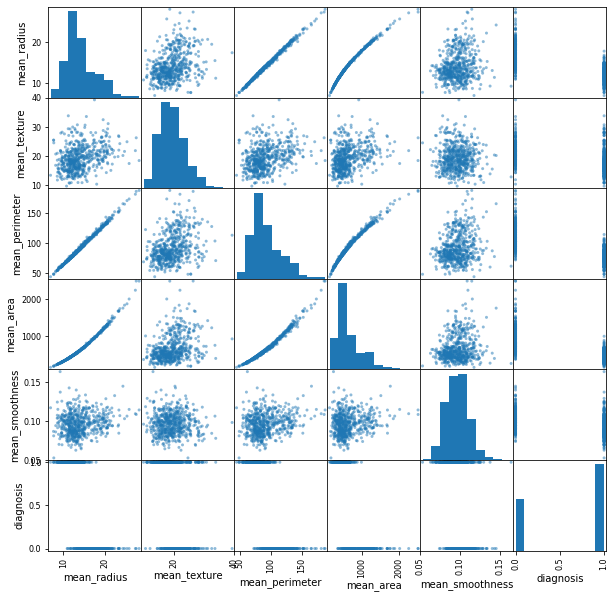

In [6]:
scatter_matrix(a, figsize = (10,10))
plt.show()

In [7]:
X = a.iloc[:,:-1].values
y = a.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
cls = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
clf=SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
models=[]
models.append(("KNN",cls))
models.append(("SVM",clf))

In [11]:
for name, model in models:
       y_pred = model.predict(X_test)
       print(name)
       print(accuracy_score(y_test, y_pred))
       print(classification_report(y_test, y_pred))

KNN
0.9122807017543859
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        47
           1       0.90      0.96      0.93        67

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

SVM
0.8771929824561403
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.84      0.99      0.90        67

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [12]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8771929824561403


In [13]:
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred)
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[34 13]
 [ 1 66]]
Accuracy score: 0.8771929824561403
Precision score: 0.8354430379746836
Recall score: 0.9850746268656716


In [14]:
print("Example Test Case")
arr=np.array([[17.95,20.01,114.2,982,0.08402]])
arr=arr.reshape(len(arr), -1)
prediction = clf.predict(arr)
if prediction==0:
       print('Malignant')
elif prediction==1:
       print('Benign')

Example Test Case
Malignant
